In [7]:
import pandas as pd

df = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full = df.to_numpy()


In [9]:
# 타깃 데이터 불러오기
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [41]:
#훈련, 테스트 데이터 세트로 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
# 변환기 작동원리 살펴보기
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [37]:
#실제 데이터 적용
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [43]:
# 다중 회귀 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print( lr.score(train_poly,train_target) , lr.score(test_poly, test_target))

0.9903183436982124 0.9714559911594155


In [124]:
# 만약 고차항이라면?
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)
print( lr.score(train_poly, train_target) , lr.score(test_poly, test_target) )

0.9999999999938144 -144.40744532797535


In [126]:
# 규제를 위한 정규화 진행

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

(42, 55)

In [127]:
# Ridge 회귀 모형

from sklearn.linear_model import Ridge 
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)
ridge.score(test_scaled, test_target)

0.9790693977615386

In [128]:
# 최적의 alpha 값 찾기

import matplotlib.pyplot as plt
import numpy as np
train_score = []
test_score = []

In [129]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

Text(0, 0.5, 'R^2')

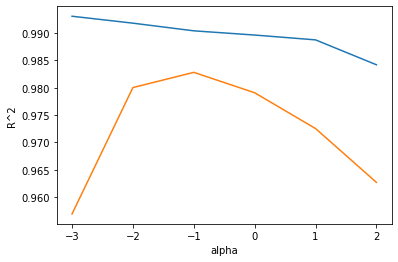

In [131]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')

In [135]:
ridge = Ridge(alpha = 0.01)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target))

0.9917809981250512 0.9800187936872427


In [141]:
# 라쏘회귀로 해보기
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target),
lasso.score(test_scaled, test_target))

0.9897898972080961 0.9800593698421884


In [181]:
# alpha 바꾸어가며 그래프 그리기

alpha_list = [0.001, 0.1, 1, 10, 100]
train_score = []
test_score = []

for alpha in alpha_list :
    lasso = Lasso(alpha = alpha, max_iter= 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\82104\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792032, tolerance: 518.2793833333334
  positive)


Text(0, 0.5, 'R^2')

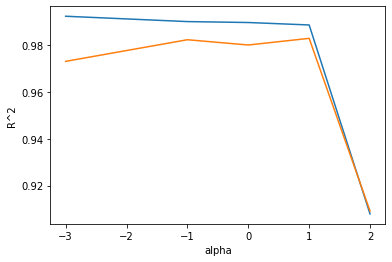

In [178]:

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')

In [185]:
# alpha 가 10일 때 모델링과 Lasso 가 회귀계수를 0으로 만든 특성 갯수 확인

lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)


print(np.sum(lasso.coef_==0))

40
